In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl

In [3]:
df = pd.read_csv("../csv/FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [32]:
cdf=df[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_CITY","CO2EMISSIONS",]]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,2.0,4,9.9,196
1,2.4,4,11.2,221
2,1.5,4,6.0,136
3,3.5,6,12.7,255
4,3.5,6,12.1,244
5,3.5,6,11.9,230
6,3.5,6,11.8,232
7,3.7,6,12.8,255
8,3.7,6,13.4,267


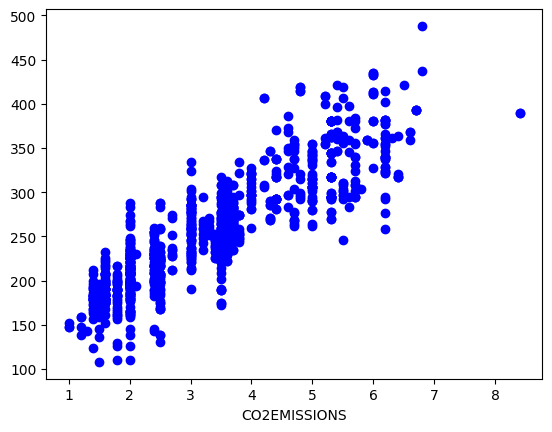

In [41]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="blue")
plt.xlabel("ENGINESIZE")
plt.xlabel("CO2EMISSIONS")
plt.show()

In [47]:
msk=np.random.rand(len(cdf)) < 0.8
train= cdf [msk]
test= cdf [~msk]

In [71]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x=np.asanyarray(train[["ENGINESIZE"]])
train_y=np.asanyarray(train[["CO2EMISSIONS"]])

test_x=np.asanyarray(train[["ENGINESIZE"]])
test_y=np.asanyarray(train[["CO2EMISSIONS"]])

poly=PolynomialFeatures(degree=2)
train_x_poly=poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [72]:
clf=linear_model.LinearRegression()
train_y_=clf.fit(train_x_poly,train_y)

print("Coefficients",clf.coef_)
print("Intercept",clf.intercept_)

Coefficients [[ 0.         49.03518663 -1.36164362]]
Intercept [110.29013496]


Text(0, 0.5, 'emishen')

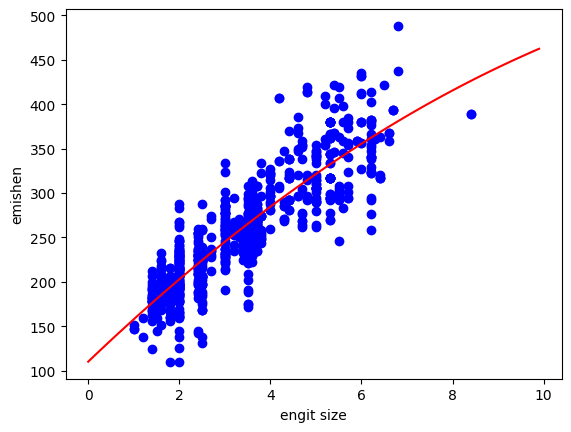

In [73]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="blue")
XX=np.arange(0.0,10.0,0.1)
yy=clf.intercept_[0]+ clf.coef_[0] [1] * XX + clf.coef_[0] [2] *np.power(XX,2)
plt.plot(XX,yy,"-r")
plt.xlabel("engit size")
plt.ylabel("emishen")


In [74]:
from sklearn.metrics import r2_score

test_x_poly=poly.fit_transform(test_x)
test_y_=clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_-test_y)))
print("Residual sum of aquares (MSE): %.2f" % np.mean(np.absolute(test_y_-test_y))**2)
print("r2_score: %.2f" % r2_score(test_y,test_y_))

Mean absolute error: 23.25
Residual sum of aquares (MSE): 540.51
r2_score: 0.77
